In [1]:
import pandas as pd

In [2]:
# 연도에 따른 용도별 전력 사용량 비율 계산

df=pd.read_csv('시군구_월_용도별사용.csv')

# 지역별은 필요 없으므로 지역 컬럼에서 전체로 가져오고 필요한 칼럼만 추출 
df=df[df['metro']=='전체'][['year','cntr','powerUsage']]

# 각 연도의 용도별 합계 구하기
df = df.groupby(['year','cntr']).sum().reset_index()

# 비율 구하기 위해 각 연도의 전체 전력 사용량 계산
df_sum=df.groupby('year').sum()
df_sum.rename(columns={'powerUsage':'powerUsage_sum'},inplace=True)

# 전체 사용량 df에 붙이기
df=df.merge(df_sum,on='year')

# 비율 구하기
df['percent']=df['powerUsage']/df['powerUsage_sum']

In [17]:
df

,year,cntr,powerUsage,powerUsage_sum,percent
0,2002,가로등,2072901862,278418898731,0.007445
1,2002,교육용,2953541283,278418898731,0.010608
2,2002,농사용,6317073677,278418898731,0.022689
3,2002,산업용,151194200654,278418898731,0.543046
4,2002,심 야,15013512366,278418898731,0.053924
...,...,...,...,...,...
149,2023,농사용,2166778420,51240910580,0.042286
150,2023,산업용,25866137211,51240910580,0.504795
151,2023,심 야,1603263144,51240910580,0.031289
152,2023,일반용,12947643155,51240910580,0.252682


In [70]:
# df=df.pivot_table(index='year',columns='cntr',values='percent')
# df=df.applymap(lambda x:x*100)


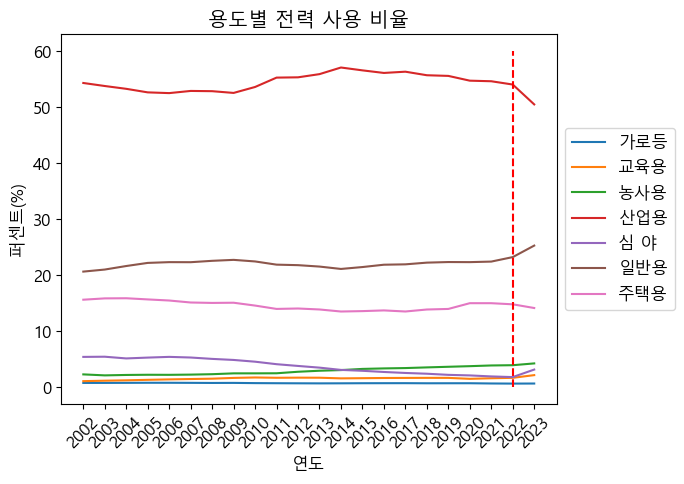

In [73]:
plt.plot(df)
plt.legend(df.columns,
          loc='center left',        # 위치
          bbox_to_anchor=(1,0.5))   # 기준 값 설정
# plt.xticks(
plt.xlabel('연도')
plt.ylabel('퍼센트(%)')
plt.title('용도별 전력 사용 비율')
plt.xticks(range(min(df.index),
                      max(df.index)+1),rotation=45)
plt.vlines(2022,
           ymin=0,
           ymax=60,
           linestyle = 'dashed',colors='r')
plt.show()

In [4]:
data=df[df['year']==2023][['year','cntr','percent']]
data

,year,cntr,percent
147,2023,가로등,0.006365
148,2023,교육용,0.021365
149,2023,농사용,0.042286
150,2023,산업용,0.504795
151,2023,심 야,0.031289
152,2023,일반용,0.252682
153,2023,주택용,0.141219


In [5]:
import matplotlib.pyplot as plt

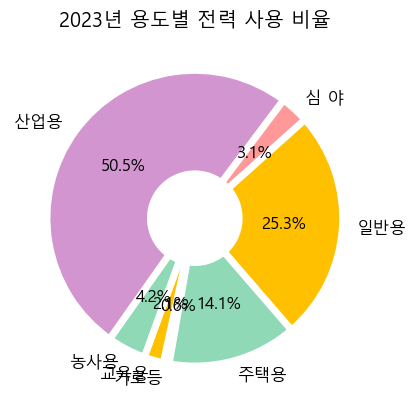

In [78]:
# fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
# ax = fig.add_subplot() ## 프레임 생성

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(data['percent'],
        labels=data['cntr'],
        autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
       # wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       # )
plt.title('2023년 용도별 전력 사용 비율')
plt.show()